In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread("dog2.jpg",cv2.IMREAD_GRAYSCALE)

In [3]:
img = cv2.resize(img,(64,128))

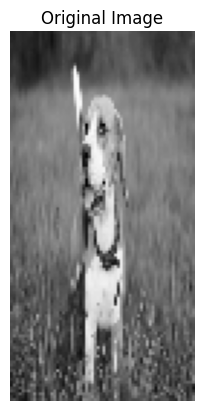

In [4]:
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [5]:
gx = cv2.Sobel(np.float32(img),cv2.CV_32F,1,0,ksize=1)
gy = cv2.Sobel(np.float32(img),cv2.CV_32F,0,1,ksize=1)

In [6]:
magnitude , angle = cv2.cartToPolar(gx,gy,angleInDegrees=True)

In [7]:
cell_size = (8,8)
bin_n = 9
h,w = img.shape
cell_x = w // cell_size[0]
cell_y = h // cell_size[1]

In [8]:
hog_cells = np.zeros((cell_y,cell_x,bin_n),dtype=np.float32)

In [9]:
for i in range(cell_y):
    for j in range(cell_x):
        mag_cell = magnitude[i*8:(i+1)*8, j*8:(j+1)*8]
        ang_cell = angle[i*8:(i+1)*8 , j*8:(j+1)*8]

        hist, _ = np.histogram(ang_cell,bins = bin_n,range = (0,180),weights = mag_cell)
        hog_cells[i,j] = hist


In [10]:
block_size = (2,2)
eps = 1e-5
hog_normalized = []

for i in range(cell_y):
    for j in range(cell_x):
        block = hog_cells[i:i+2 , j:j+2].ravel()
        norm = np.sqrt(np.sum(block)**2 + eps**2)
        block = block // norm
        hog_normalized.append(block)


In [11]:
hog_features = np.hstack(hog_normalized)

print("Hog Feature Vector length : ", len(hog_features))

Hog Feature Vector length :  4185
